<a href="https://colab.research.google.com/github/Ivan8Garcia/challenge-data-science/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE 2: Prediccion de Cancelación (Churn)**

##**Misión**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **Objetivos del Desafío**

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [215]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

datos=pd.read_csv("/content/datos_TelecomX_tratados.csv")
datos.shape

(7043, 22)

In [216]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [217]:
datos.head(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,Yes,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [218]:
datos.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [219]:
datos.describe(include="O")

,customerID,customer.gender,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,1,3555,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


#**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [220]:
datos=datos.drop("customerID",axis=1)
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0,Female,0,1,1,9,Yes,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,Yes,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,Yes,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,Yes,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,Yes,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [221]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   int64  
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   int64  
 4   customer.Dependents        7043 non-null   int64  
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

#**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Puedes usar **value_counts()** de pandas para obtener esta proporción:

In [222]:
import plotly.express as px

In [223]:
px.histogram(datos, x= 'Churn', text_auto = True)

In [224]:
# 0= NO CHURN  ; 1= CHURN
px.histogram(datos, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group')

Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna churn. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

In [225]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']


In [226]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


#**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [227]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


categoricas = ['customer.gender','phone.PhoneService','account.Contract','account.PaymentMethod', 'phone.MultipleLines','internet.InternetService',
               'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV',
               'internet.StreamingMovies']

In [228]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)



In [229]:
columnas = X.columns
X = one_hot_enc.fit_transform(X)
X = pd.DataFrame(X, columns=one_hot_enc.get_feature_names_out(columnas))

Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el LabelEncoder, que es el método recomendado para esta tarea.

In [230]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

1 - Vamos a separar el conjunto de datos entre entrenamiento y prueba, para ello necesitamos utilizar el método train_test_split de la biblioteca Scikit-Learn. Primero, vamos a importar la función con el código:

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

2 - Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el DummyClassifier a partir de los datos de entrenamiento. Primero, vamos a importar la función:

In [232]:
from sklearn.dummy import DummyClassifier

In [233]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)


0.7348097671777399

3 - Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función, inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos de prueba. Vamos entonces a cada una de estas tareas, utilizando el **max_depth=5** al momento de inicializar el modelo

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
arbol = DecisionTreeClassifier(max_depth = 10, random_state =5)
arbol.fit(X_train,y_train)

arbol.score(X_test,y_test)

0.7637705848949461

In [236]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

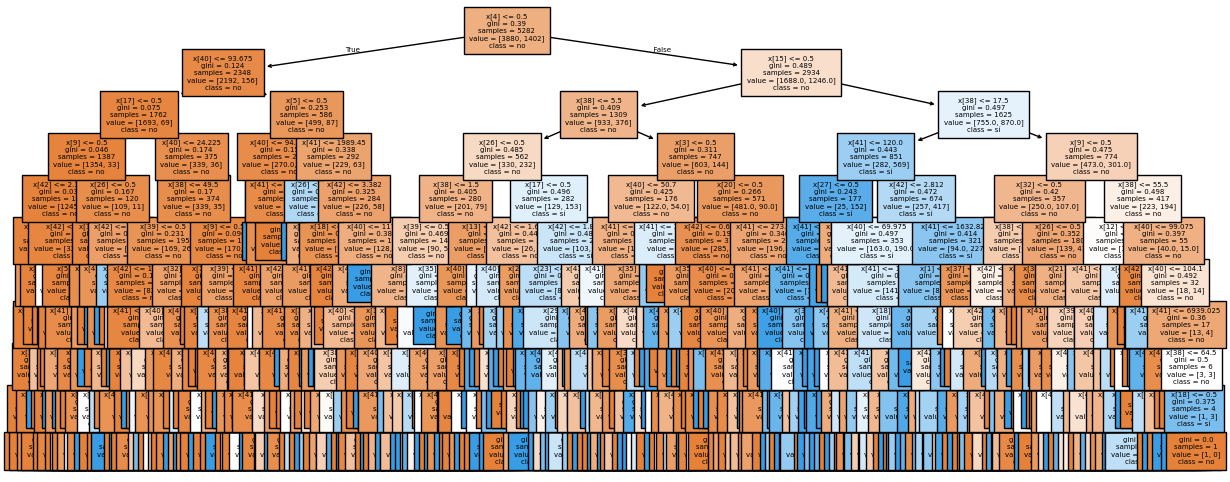

In [237]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

In [238]:
#Esto te mostrará cuántos valores faltantes hay en cada columna.
X_train.isnull().sum()

,0
onehotencoder__customer.gender_Female,0
onehotencoder__customer.gender_Male,0
onehotencoder__phone.PhoneService_No,0
onehotencoder__phone.PhoneService_Yes,0
onehotencoder__account.Contract_Month-to-month,0
onehotencoder__account.Contract_One year,0
onehotencoder__account.Contract_Two year,0
onehotencoder__account.PaymentMethod_Bank transfer (automatic),0
onehotencoder__account.PaymentMethod_Credit card (automatic),0
onehotencoder__account.PaymentMethod_Electronic check,0


In [239]:
rf= RandomForestClassifier(max_depth = 10, random_state=5)
rf.fit(pd.DataFrame(X_train), y_train)
rf.score(X_test,y_test)

0.8080636002271436

# **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como **Decision Tree, Random Forest y XGBoost,** no son sensibles a la escala de los datos.

In [240]:
from sklearn.preprocessing import MinMaxScaler

1 - Para hacer la normalización de los datos, vamos a utilizar el método MinMaxScaler. Primero, importamos la función y luego hacemos la transformación de los datos de entrenamiento de las variables explicativas, almacenando en una nueva variable **X_train_normalizado:**

In [241]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train_imputado)

si quisieramos visualizar el resultado de la transformación, podemos utilizar el método pd.DataFrame para generar una tabla con los datos:

In [242]:
#Esto devolverá todas las filas que contienen al menos un valor faltante.
np.isnan(X_train_normalizado).sum()

np.int64(0)

In [243]:
#Si ya normalizaste los datos y quieres verificar:

#Esto te dice cuántos valores NaN hay en el array después de la normalización.

#Si X_train_normalizado todavía es un DataFrame:
pd.DataFrame(X_train_normalizado).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


2 - Con los datos normalizados, podemos generar el modelo de vecinos más cercanos con el KNeighborsClassifier a partir de los datos de entrenamiento normalizados. Primero, importamos la función

In [244]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = imputer.fit_transform(X_train)
X_train_normalizado = normalizacion.fit_transform(X_train_imputado) # Redundant

In [246]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [247]:
X_test_imputado = imputer.transform(X_test)
X_test_normalizado = normalizacion.transform(X_test_imputado) # Redundante

In [248]:
knn.score(X_test_normalizado, y_test)

0.7688813174332766

In [249]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')
print(f'Exactitud RF: {rf.score(X_test,y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud Árbol: 0.7637705848949461
Exactitud KNN: 0.7688813174332766
Exactitud RF: 0.8080636002271436


#**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor **correlación con la cancelación(churn)**, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

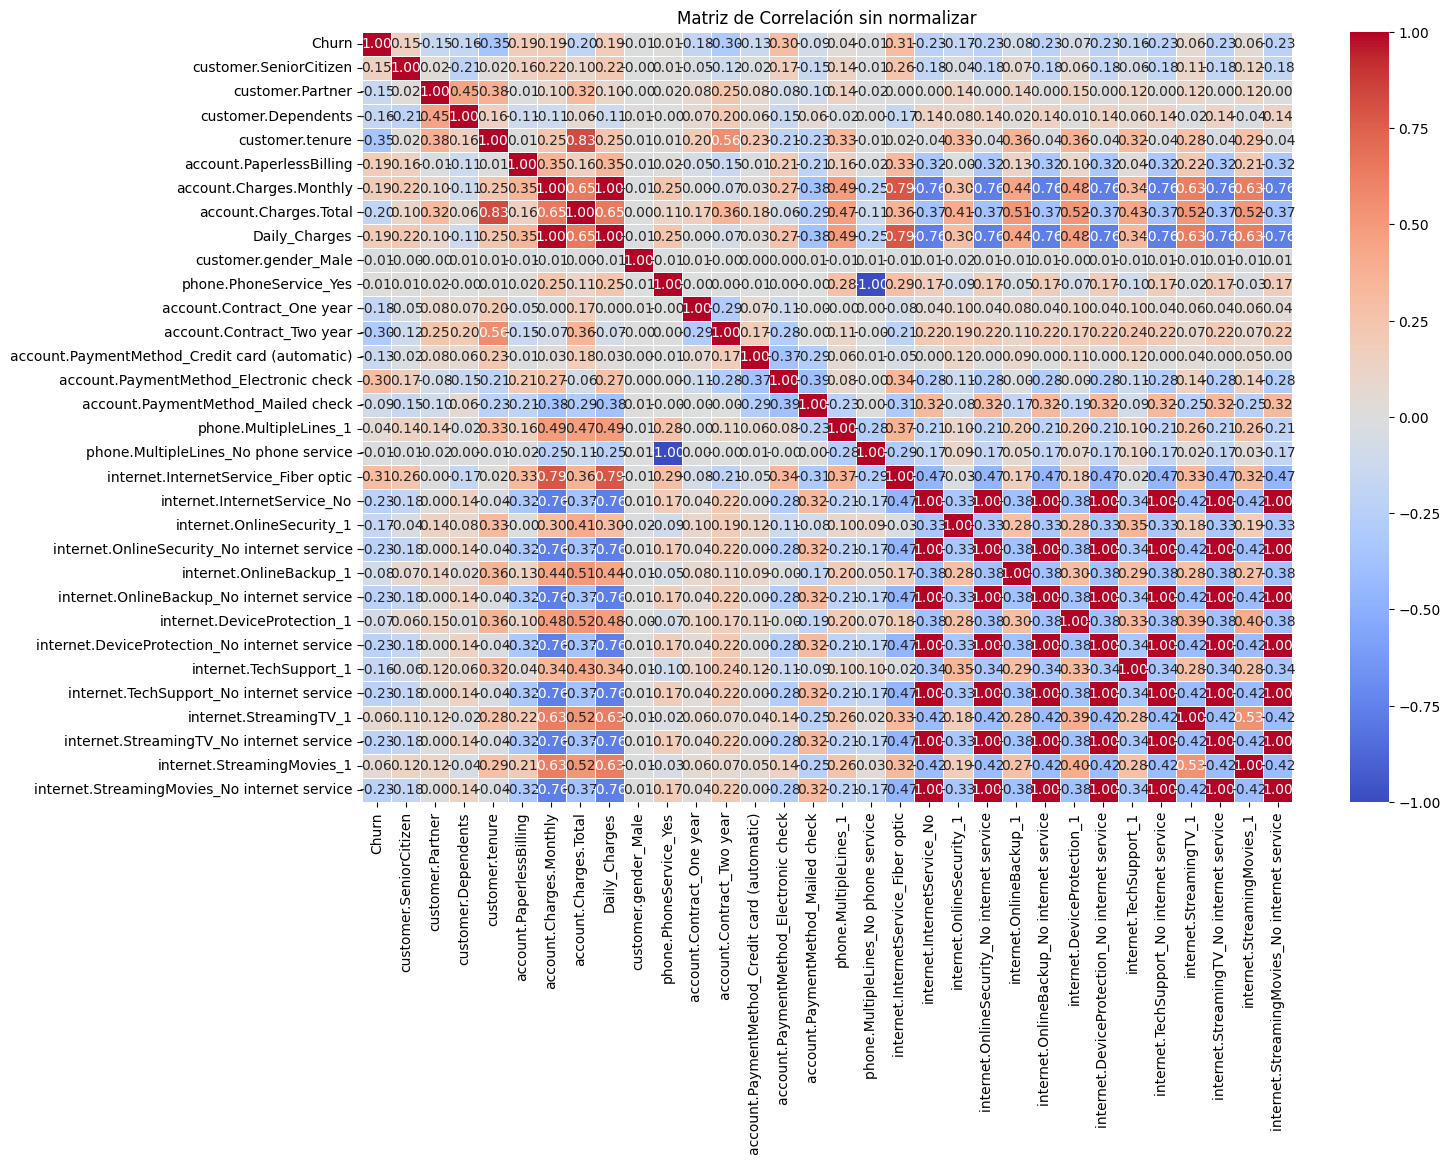


Correlación con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Daily_Charges                                    0.193356
account.PaperlessBilling                         0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_1                           0.063228
internet.StreamingMovies_1                       0.061382
phone.MultipleLines_1                            0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_1                     -0.066160
internet.OnlineBackup_1                         -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply one-hot encoding to the categorical columns in the 'datos' DataFrame
datos_encoded = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = datos_encoded.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación sin normalizar')
plt.show()

# Opcionalmente, puedes mostrar solo las correlaciones con 'Churn'
print("\nCorrelación con Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

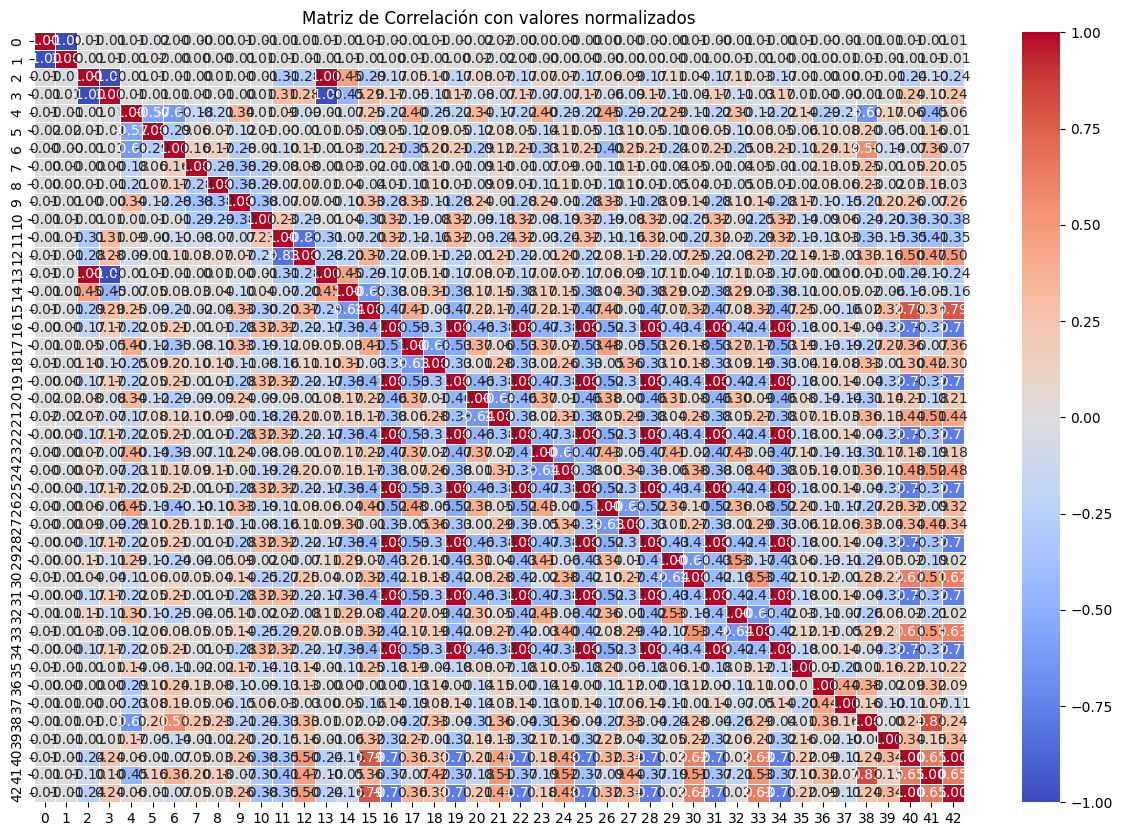


Correlación con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Daily_Charges                                    0.193356
account.PaperlessBilling                         0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_1                           0.063228
internet.StreamingMovies_1                       0.061382
phone.MultipleLines_1                            0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_1                     -0.066160
internet.OnlineBackup_1                         -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.000000,-1.000000,0.008294,-0.008294,0.009905,-0.016946,0.004525,-0.001438,-0.001066,0.010099,...,0.009357,-0.004814,0.005450,-0.001716,-0.008462,-0.012311,0.005985,0.011731,-0.007616,0.011731
1,-1.000000,1.000000,-0.008294,0.008294,-0.009905,0.016946,-0.004525,0.001438,0.001066,-0.010099,...,-0.009357,0.004814,-0.005450,0.001716,0.008462,0.012311,-0.005985,-0.011731,0.007616,-0.011731
2,0.008294,-0.008294,1.000000,-1.000000,-0.006429,0.013198,-0.005022,-0.001511,0.005104,0.003591,...,0.033350,-0.170388,-0.005281,-0.004274,0.000336,0.008183,-0.011535,-0.243439,-0.104399,-0.243439
3,-0.008294,0.008294,-1.000000,1.000000,0.006429,-0.013198,0.005022,0.001511,-0.005104,-0.003591,...,-0.033350,0.170388,0.005281,0.004274,-0.000336,-0.008183,0.011535,0.243439,0.104399,0.243439
4,0.009905,-0.009905,-0.006429,0.006429,1.000000,-0.569023,-0.625996,-0.184824,-0.205679,0.336378,...,-0.115104,-0.220634,0.138385,-0.289656,-0.231859,-0.645257,0.166893,0.064091,-0.446918,0.064091
5,-0.016946,0.016946,0.013198,-0.013198,-0.569023,1.000000,-0.285062,0.061776,0.071871,-0.123215,...,0.060145,0.050536,-0.055742,0.099882,0.084732,0.200996,-0.054557,-0.007918,0.164761,-0.007918
6,0.004525,-0.004525,-0.005022,0.005022,-0.625996,-0.285062,1.000000,0.156850,0.171586,-0.275240,...,0.077131,0.209249,-0.108442,0.242906,0.189905,0.561511,-0.142795,-0.067196,0.364688,-0.067196
7,-0.001438,0.001438,-0.001511,0.001511,-0.184824,0.061776,0.156850,1.000000,-0.280326,-0.378029,...,0.052434,-0.008893,-0.024798,0.126363,0.048009,0.251070,-0.007608,0.049088,0.198888,0.049088
8,-0.001066,0.001066,0.005104,-0.005104,-0.205679,0.071871,0.171586,-0.280326,1.000000,-0.375319,...,0.045194,0.005351,-0.019790,0.078410,0.063121,0.230983,-0.019133,0.029751,0.176387,0.029751
9,0.010099,-0.010099,0.003591,-0.003591,0.336378,-0.123215,-0.275240,-0.378029,-0.375319,1.000000,...,0.138908,-0.280677,0.165540,-0.096972,-0.148770,-0.211895,0.199067,0.263572,-0.065502,0.263572


In [251]:
#datos_encoded_normalizado la cree para visualizar otro mapa de calor de correlaciones
datos_encoded_normalizado =(X_train_normalizado)

#hay que generar la matriz de correlacion usando los datos de X_train_normalizado
correlation_matrix_=pd.DataFrame(datos_encoded_normalizado).corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación con valores normalizados')
plt.show()

# Opcionalmente, puedes mostrar solo las correlaciones con 'Churn'
print("\nCorrelación con Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

correlation_matrix_

In [252]:
df=pd.DataFrame(X_train_normalizado)

#**Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

**Tiempo de contrato x Cancelación**

**Gasto total x Cancelación**

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

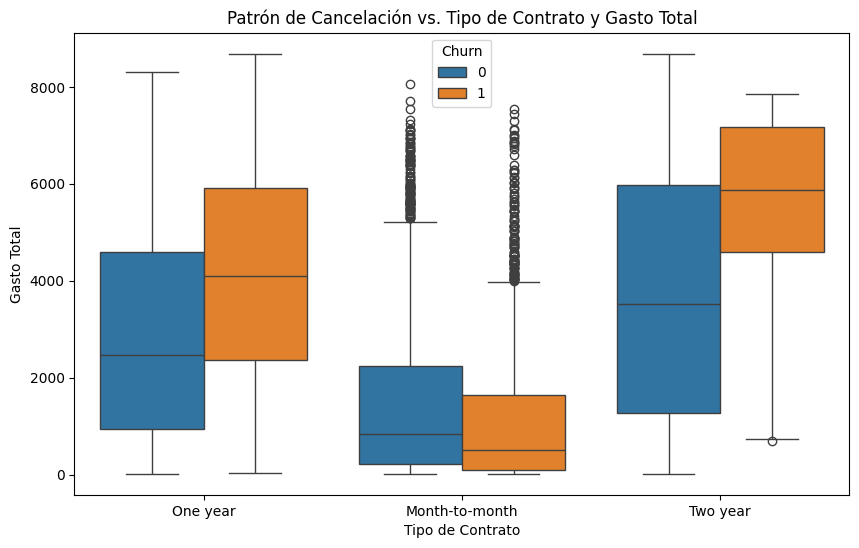

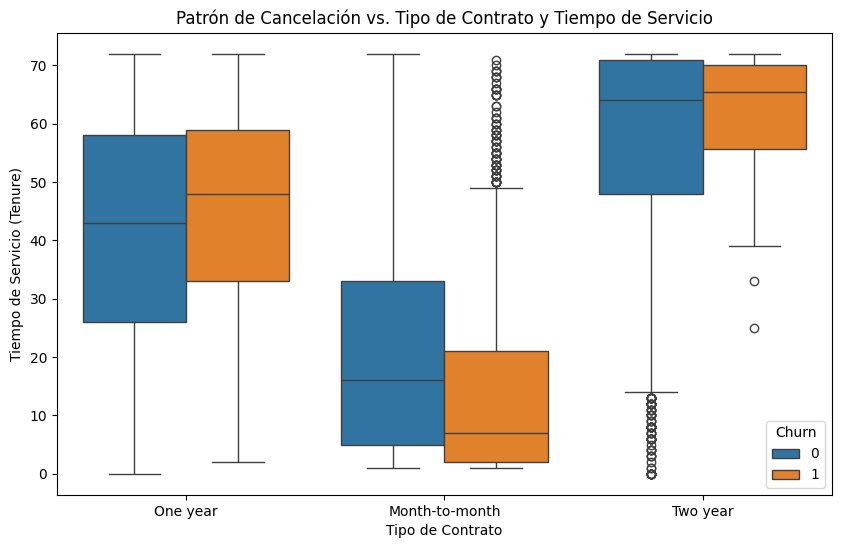

In [253]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='account.Contract', y='account.Charges.Total', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Gasto Total')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='account.Contract', y='customer.tenure', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Tiempo de Servicio')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tiempo de Servicio (Tenure)')
plt.show()


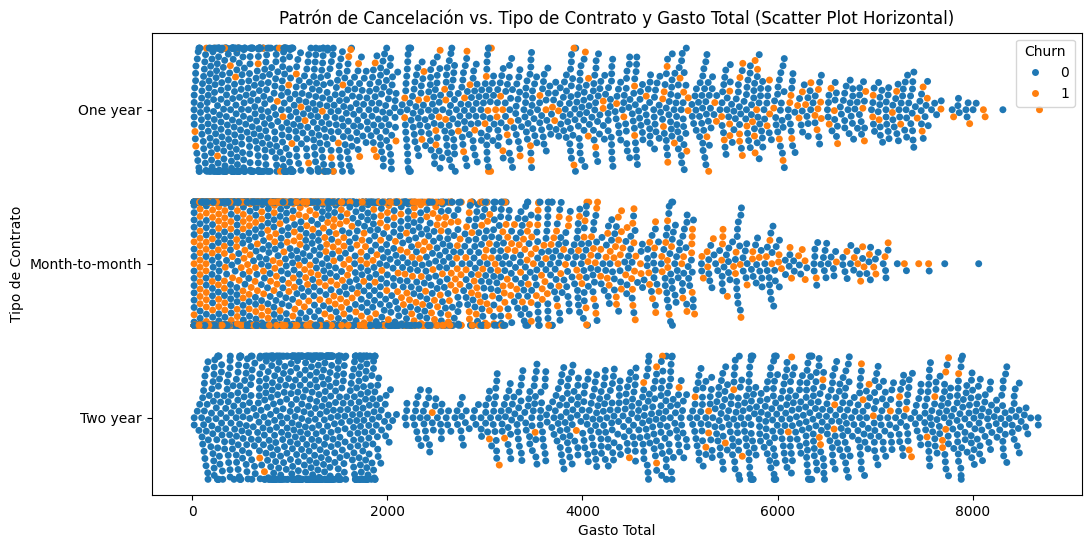

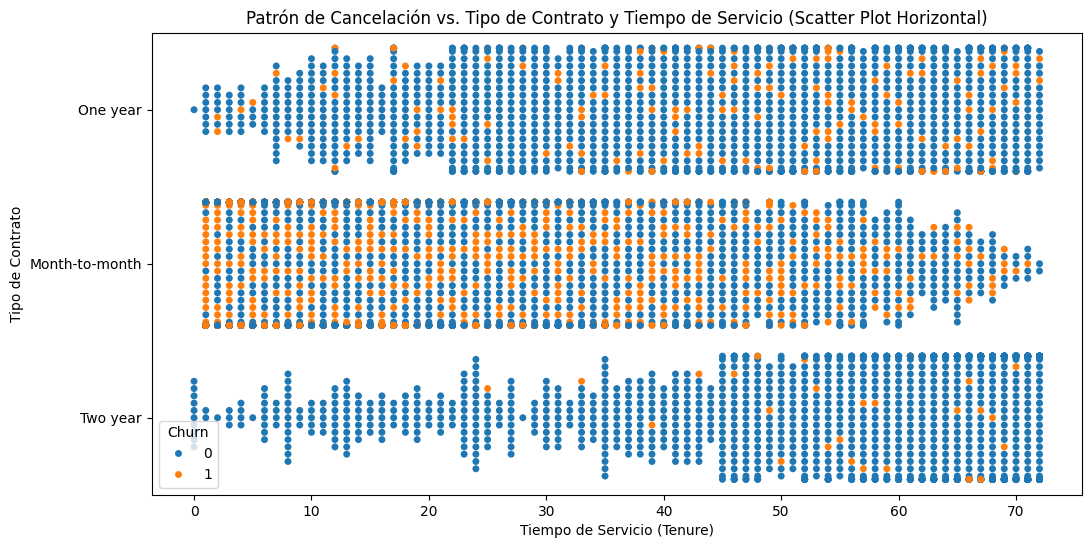

In [254]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='account.Charges.Total', y='account.Contract', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Gasto Total (Scatter Plot Horizontal)')
plt.xlabel('Gasto Total')
plt.ylabel('Tipo de Contrato')
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x='customer.tenure', y='account.Contract', hue='Churn', data=datos)
plt.title('Patrón de Cancelación vs. Tipo de Contrato y Tiempo de Servicio (Scatter Plot Horizontal)')
plt.xlabel('Tiempo de Servicio (Tenure)')
plt.ylabel('Tipo de Contrato')
plt.show()


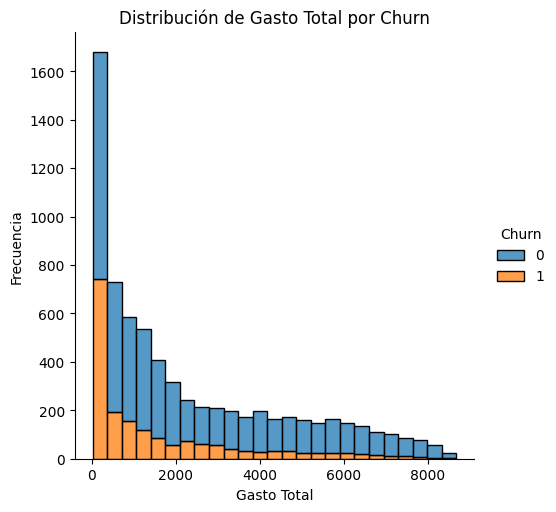

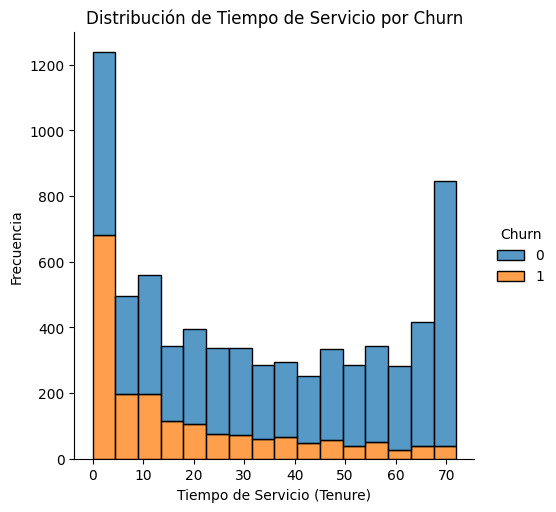

In [255]:
# prompt: por ultimo genera una grafica de distribucion de frecuencias usando displot

sns.displot(data=datos, x="account.Charges.Total", hue="Churn", kind="hist", multiple="stack")
plt.title('Distribución de Gasto Total por Churn')
plt.xlabel('Gasto Total')
plt.ylabel('Frecuencia')
plt.show()

sns.displot(data=datos, x="customer.tenure", hue="Churn", kind="hist", multiple="stack")
plt.title('Distribución de Tiempo de Servicio por Churn')
plt.xlabel('Tiempo de Servicio (Tenure)')
plt.ylabel('Frecuencia')
plt.show()

#**Modelado Predictivo**

**Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [256]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as pd

In [257]:
datos.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

In [258]:
datos

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0,Female,0,1,1,9,Yes,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Male,0,0,0,9,Yes,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Male,0,0,0,4,Yes,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,Yes,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,Yes,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,Yes,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7039,1,Male,0,1,0,22,Yes,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7040,0,Male,0,0,0,2,Yes,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,0,Male,0,1,1,67,Yes,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [259]:
#ahora tenemos que dividir el conjunto de nuestros datos en entrenamiento y prueba, la division sera 70% para entrenamiento y 30% para prueba
#este dataframe normalizado ya no tiene la columna churn porque eso se hizo desde el comienzo
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.847222,1.0,0.429851,0.430689,0.429851
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.958333,1.0,0.429851,0.474544,0.429851
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.652778,1.0,0.663682,0.461487,0.663682
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.986111,1.0,0.902985,0.881952,0.902985
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.254229,0.060253,0.254229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.375000,0.0,0.319403,0.160691,0.319403
5278,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.486111,1.0,0.944776,0.449486,0.944776
5279,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.361111,1.0,0.331343,0.147311,0.331343
5280,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.270647,0.014182,0.270647


In [260]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')
print(f'Exactitud RF: {rf.score(X_test,y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud Árbol: 0.7637705848949461
Exactitud KNN: 0.7688813174332766
Exactitud RF: 0.8080636002271436


In [261]:
#segundo,empezaremos a segmentar nuestras X_train,etc...
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
#X=datos.drop(columns="Churn")
#y=datos["Churn"]


In [262]:
baseline=DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [263]:
#ahora vamos a evaluar el modelo usando metricas
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred_dummy=baseline.predict(X_test)

def calcular_regresion (y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test,y_pred)
  metricas={
      "RMSE":round(rmse**(1/2),4),
      "MAE":round(mae,4),
      "R2":round(r2,4)
  }
  return metricas

In [264]:
#aqui vemos que el modelo generalizó de una manera no tan buena
#RMSE=Error Cuadratico Medio , MAE=Error Absoluto Medio
resultados_baseline=calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 0.4391, 'MAE': 0.3887, 'R2': -0.0002}

In [265]:
import pandas as pd

#Datos de entrenamiento para usar la fórmula
df_train=pd.DataFrame(X_train)
df_train["Churn"]=y_train

#**Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

**Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

**Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [266]:
from sklearn.tree import DecisionTreeClassifier

In [267]:
modelo_0 = DecisionTreeClassifier(max_depth = 5, random_state =5)
modelo_0.fit(pd.DataFrame(X_train),y_train)

modelo_0.score(X_test,y_test)

0.791292001893043

In [268]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
modelo_1 = RandomForestClassifier(max_depth = 10, random_state=5)
modelo_1.fit(pd.DataFrame(X_train), y_train)
modelo_1.score(X_test,y_test)


0.8054898248935163

In [270]:
from sklearn.neighbors import KNeighborsClassifier

In [271]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = imputer.fit_transform(X_train)
X_train_normalizado = normalizacion.fit_transform(X_train_imputado)

In [272]:
modelo_2 = KNeighborsClassifier()
modelo_2.fit(X_train_imputado,y_train)

KNeighborsClassifier()

In [273]:
modelo_2.score(X_train_imputado,y_train)


0.8300202839756592

#**Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

**Exactitud (Acurácia)**

**Precisión**

**Recall**

**F1-score**

**Matriz de confusión**

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

**Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

**Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.3,stratify=y ,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y ,random_state=5)

In [276]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
modelo_1 = RandomForestClassifier(max_depth = 10, random_state=5)
modelo_1.fit(pd.DataFrame(X_train), y_train)
modelo_1.score(X_test,y_test)

0.8088026502602934

In [278]:
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo_1.score(pd.DataFrame(X_train),y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo_1.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.8996483635380038
La exactitud del modelo con el conjunto de validacion es de: 0.797242497972425


In [279]:
from sklearn.metrics import confusion_matrix

In [280]:

y_previsto= modelo_1.predict(X_val)
matriz_confusion=confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[811  95]
 [155 172]]


In [281]:
from sklearn.metrics import ConfusionMatrixDisplay

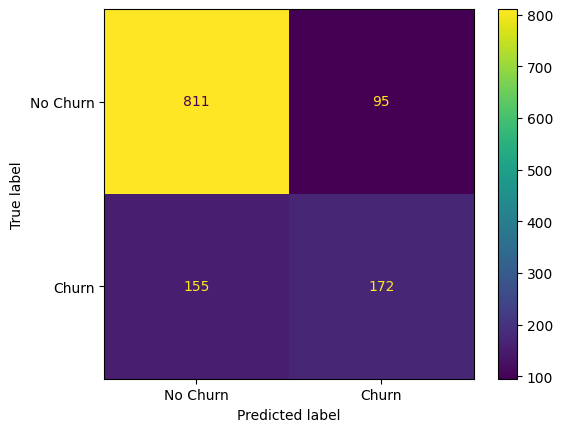

In [282]:
visualizacion= ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=["No Churn","Churn"])
visualizacion.plot();

In [283]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [284]:
print(f'La precisión del modelo es de: {precision_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de: {accuracy_score(y_val,y_previsto)}')
print(f'La sensibilidad (recall) del modelo es de: {recall_score(y_val,y_previsto)}')
print(f'El f1 score del modelo es de: {f1_score(y_val,y_previsto)}')


La precisión del modelo es de: 0.6441947565543071
La exactitud (accuracy) del modelo es de: 0.797242497972425
La sensibilidad (recall) del modelo es de: 0.5259938837920489
El f1 score del modelo es de: 0.5791245791245792


In [285]:
from sklearn.metrics import RocCurveDisplay

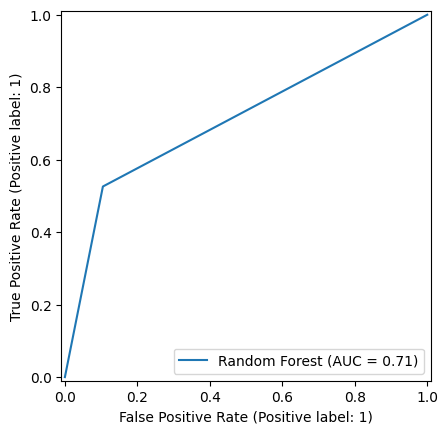

In [286]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name="Random Forest");

In [287]:
from sklearn.metrics import roc_auc_score
print(f'El area bajo la curva ROC es:{roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es:0.7105686858253843


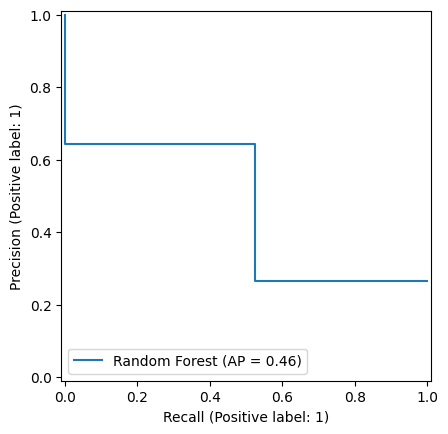

In [288]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name="Random Forest");

In [289]:
from sklearn.metrics import average_precision_score
print(f"El score promedio de Precision vs Recall es de:{average_precision_score(y_val,y_previsto)}")

El score promedio de Precision vs Recall es de:0.46455215317556997


In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       906
           1       0.64      0.53      0.58       327

    accuracy                           0.80      1233
   macro avg       0.74      0.71      0.72      1233
weighted avg       0.79      0.80      0.79      1233



##**Validacion Cruzada**

In [291]:
from sklearn.model_selection import KFold, cross_validate


In [292]:
modelo_1 = RandomForestClassifier(max_depth = 10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.54202247, 0.50262618, 0.52944994, 0.52118158, 0.54937363]),
 'score_time': array([0.02017307, 0.02224469, 0.02003312, 0.02209234, 0.02221465]),
 'test_score': array([0.77281947, 0.81135903, 0.80425963, 0.79614604, 0.79107505])}

In [293]:
cv_resultados["test_score"]

array([0.77281947, 0.81135903, 0.80425963, 0.79614604, 0.79107505])

In [294]:
promedio=cv_resultados["test_score"].mean()
desvio_estandar=cv_resultados["test_score"].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio estandar es de: {desvio_estandar}')
print(f'El intervalo de confianza es:[{promedio- 2 *desvio_estandar},{min(promedio + 2*desvio_estandar,1)}]')

El promedio de la exactitud es de: 0.795131845841785
El desvio estandar es de: 0.013129859904813187
El intervalo de confianza es:[0.7688721260321586,0.8213915656514114]


##**Validación cruzada con sensibilidad**

In [295]:
def intervalo_confianza(resultados):
  promedio=resultados["test_score"].mean()
  desvio_estandar=resultados["test_score"].std()
  return f'El intervalo de confianza es:[{promedio- 2 *desvio_estandar},{min(promedio + 2*desvio_estandar,1)}]'

In [296]:
modelo_1 = RandomForestClassifier(max_depth = 10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X,y,cv=kf,scoring="recall")
cv_resultados

{'fit_time': array([0.5490067 , 0.50388479, 0.51804018, 0.51847935, 0.81624532]),
 'score_time': array([0.03112745, 0.022192  , 0.02242327, 0.02196264, 0.03054094]),
 'test_score': array([0.45724907, 0.47035573, 0.53308824, 0.48192771, 0.49811321])}

In [297]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.4357717530549345,0.5405218291618367]'

##**Exactitud, Recall, Precisión, F1-score(Random Forest)**

In [298]:
modelo_1 = RandomForestClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo_1, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.79222417, 0.76614261, 0.57231498, 0.5329833 , 0.54117703]),
 'score_time': array([0.03903818, 0.04407692, 0.02688479, 0.03737545, 0.03053832]),
 'test_accuracy': array([0.76673428, 0.81338742, 0.80527383, 0.79411765, 0.78904665]),
 'test_recall': array([0.4795539 , 0.49011858, 0.51838235, 0.45783133, 0.50188679]),
 'test_precision': array([0.5890411 , 0.69273743, 0.6980198 , 0.62637363, 0.63636364]),
 'test_f1': array([0.52868852, 0.57407407, 0.59493671, 0.52900232, 0.56118143])}

El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos, tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold:

In [303]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [304]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.7618306163011951, 0.8255933187900827]
Intervalo de confianza(test_recall): [0.44866624986404885, 0.5304429305823654]
Intervalo de confianza(test_precision): [0.5656511478319762, 0.7313630884782115]
Intervalo de confianza(test_f1): [0.5059475540921234, 0.6092056708317841]


#**Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como **SMOTE** pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [305]:
# 0=No Churn 1=Churn
datos.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [314]:
#visualizamos estos datos en porcentaje para darnos cuenta que está desbalanceado
datos.Churn.value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


In [307]:
from sklearn.model_selection import StratifiedKFold

In [308]:
modelo_1=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo_1,X,y,cv=skf,scoring="recall")

In [309]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.5037413756318166,0.5773033437387781]'

#**Oversampling**

In [310]:
from imblearn.over_sampling import SMOTE

In [313]:
over_sampling= SMOTE()
X_balanceada,y_balanceada=over_sampling.fit_resample(X_train_normalizado,y_train)

In [301]:
#en esta celda ya nos damos cuenta que hemos balanceado
#y_balanceada.value_counts(normalize=True)